# 부산푸드뱅크현황 분석

In [2]:
import pandas as pd
df = pd.read_csv('부산광역시_푸드뱅크 및 푸드마켓 현황_20230201.csv', encoding='cp949')

In [9]:
rows = df[df['구군명'] == '연제구'][['위도', '경도']]

In [16]:
rows.iloc[1]['위도']

35.17272947

In [17]:
val = df[df['구군명'] == '영도구']

In [27]:
val

,구분,구군명,운영단체명,대표자,소재지,위도,경도,연락처,데이터기준일자
4,푸드뱅크,영도구,상리종합사회복지관,김영신,부산광역시 영도구 상리로 63-16(동삼동),35.086168,129.070776,051-404-5061,2023-02-01
20,푸드마켓,영도구,영도구 푸드마켓(상리종합사회복지관),김영신,부산광역시 영도구 태종로514(동삼동),35.084514,129.073332,051-405-1377,2023-02-01


In [28]:
val[val['구분'] == '푸드마켓']

,구분,구군명,운영단체명,대표자,소재지,위도,경도,연락처,데이터기준일자
20,푸드마켓,영도구,영도구 푸드마켓(상리종합사회복지관),김영신,부산광역시 영도구 태종로514(동삼동),35.084514,129.073332,051-405-1377,2023-02-01


In [24]:
if '마켓' in val[['구분']]:
   
    
print(a, b)

0 0


In [55]:
df['구군명'].value_counts()

연제구     3
중구      2
서구      2
동구      2
영도구     2
부산진구    2
동래구     2
남구      2
북구      2
해운대구    2
사하구     2
금정구     2
강서구     2
수영구     2
사상구     2
기장군     2
Name: 구군명, dtype: int64

## 지도 시각화
- 푸드뱅크
- 푸드마켓


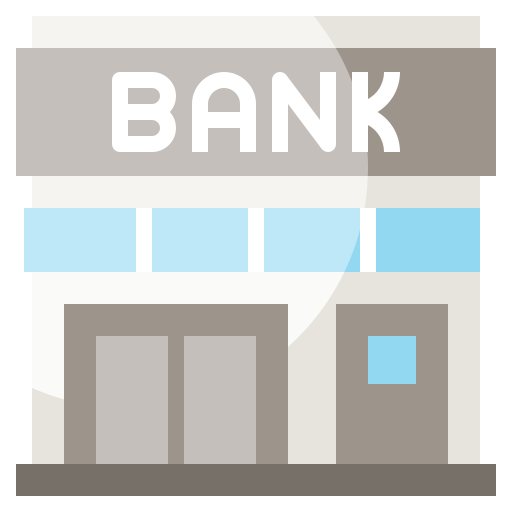
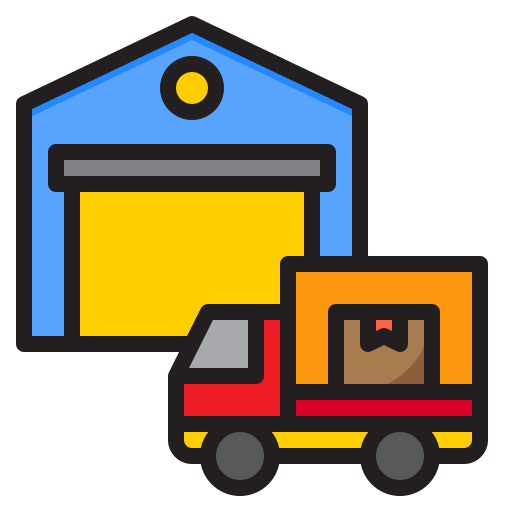
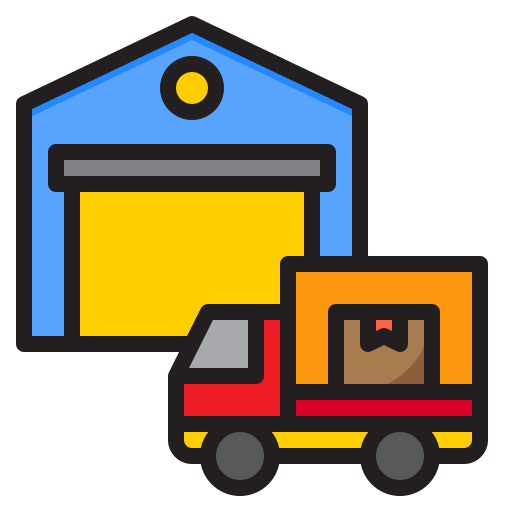
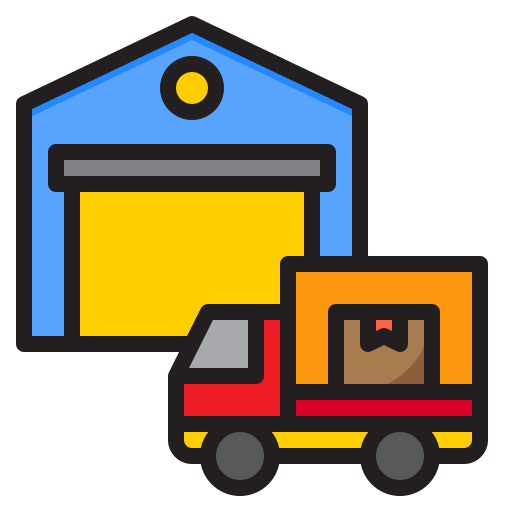
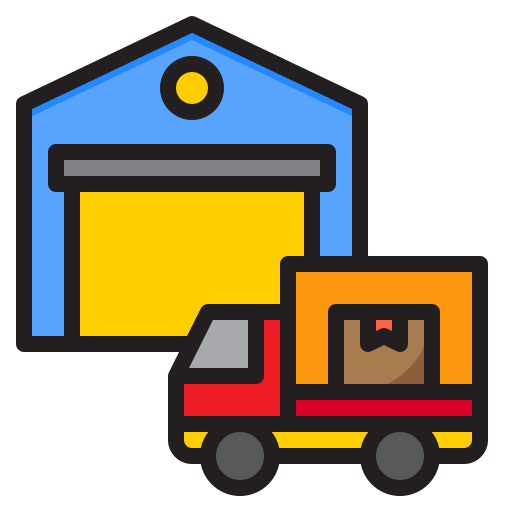
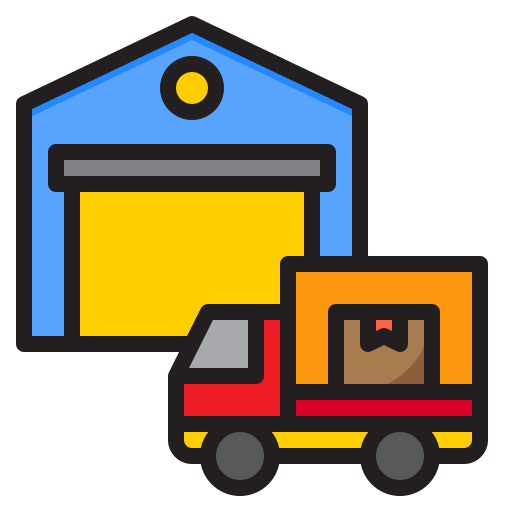
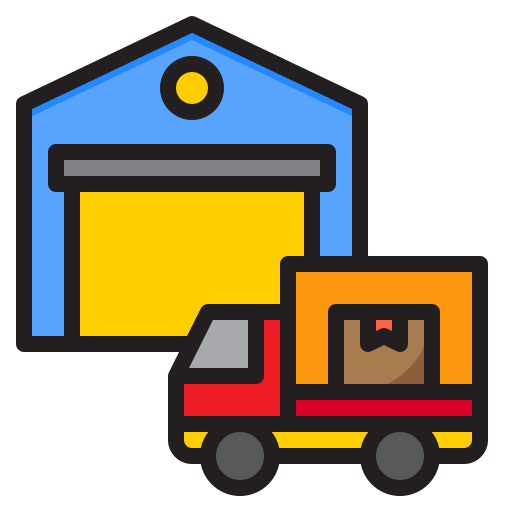
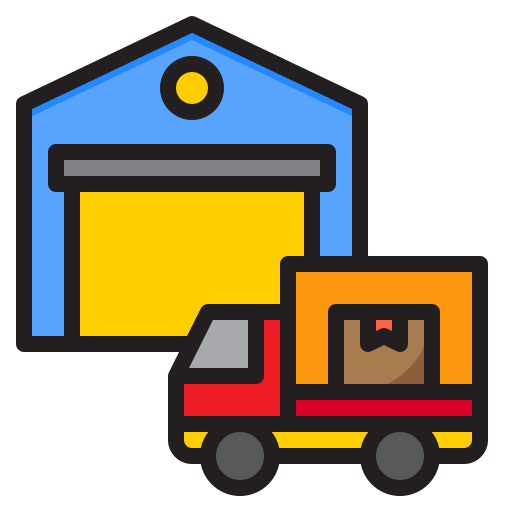
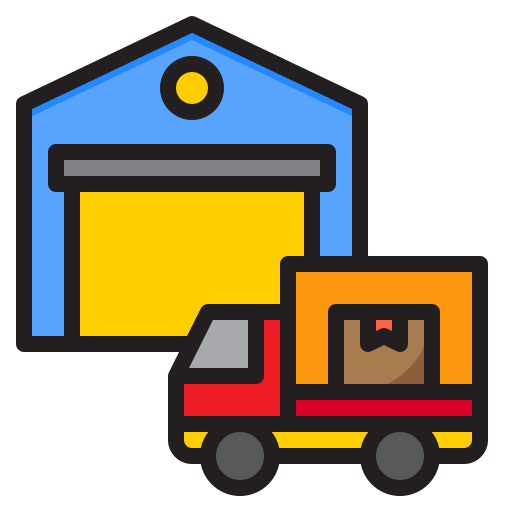
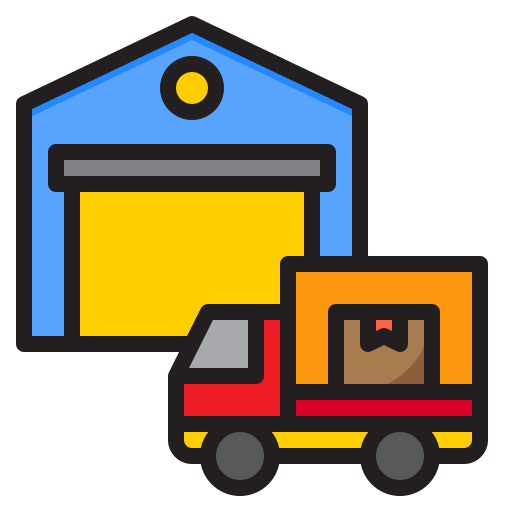
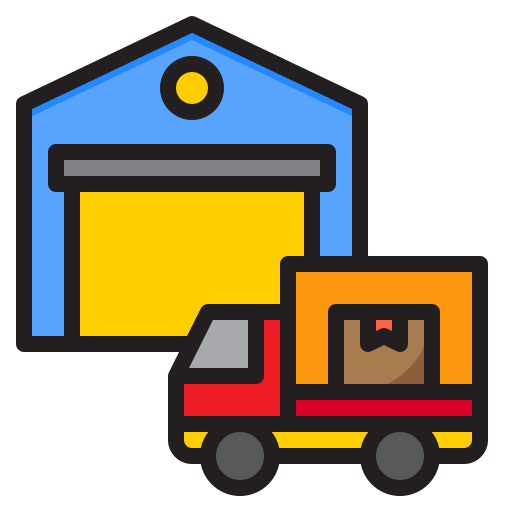
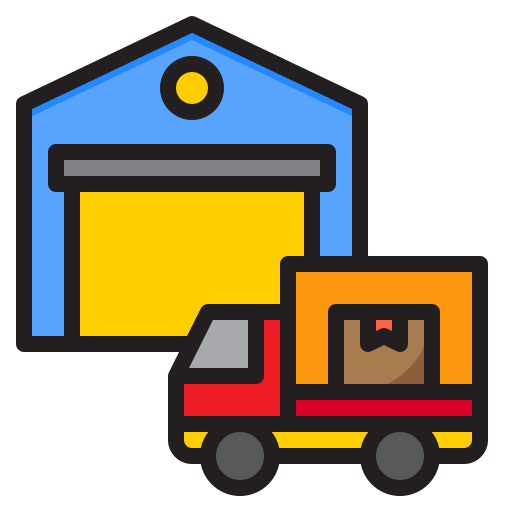
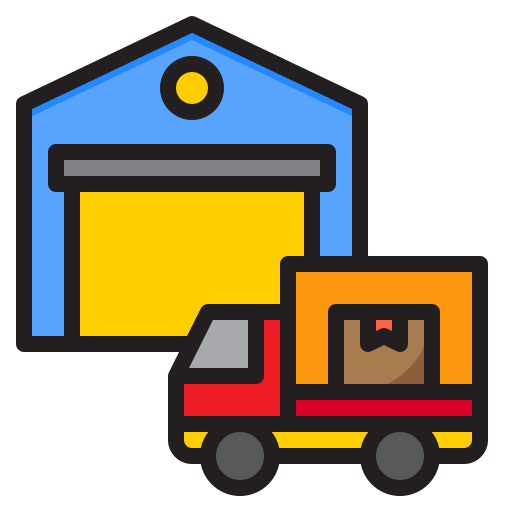
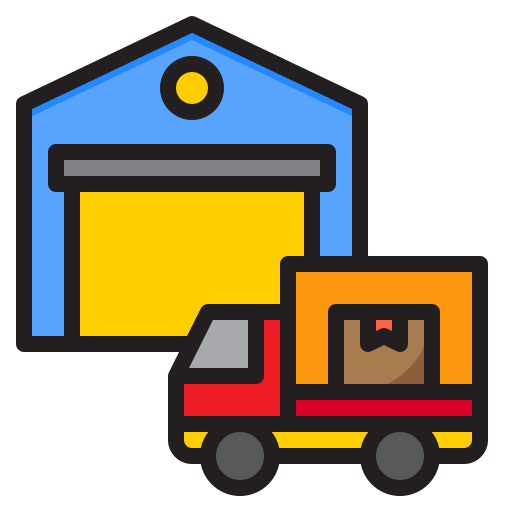
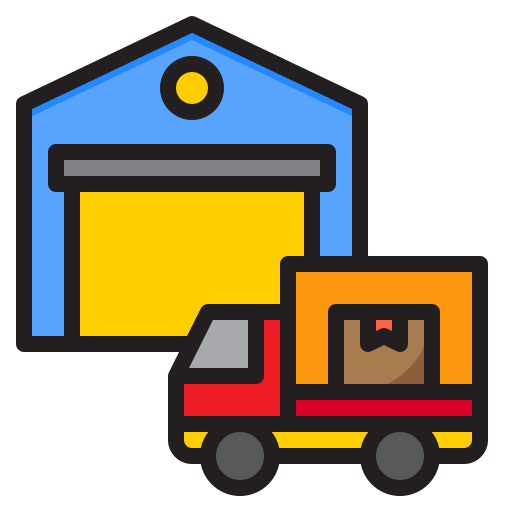
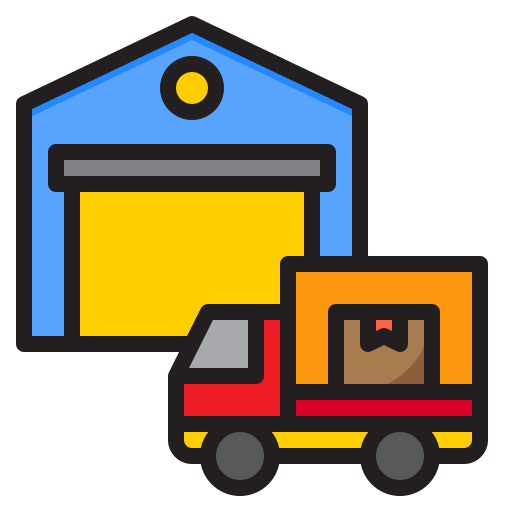
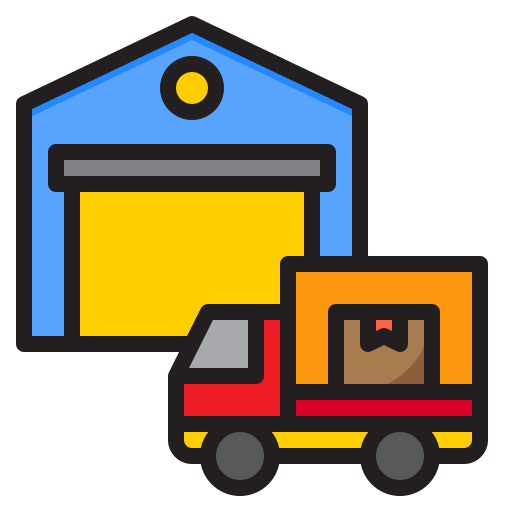
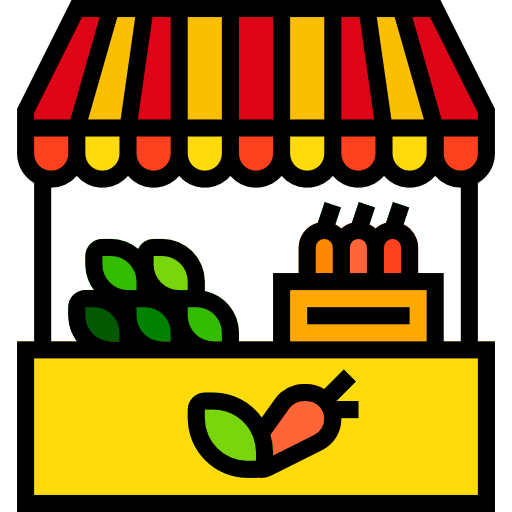
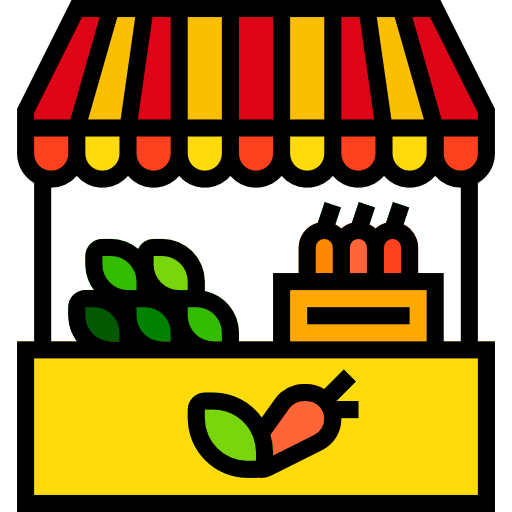
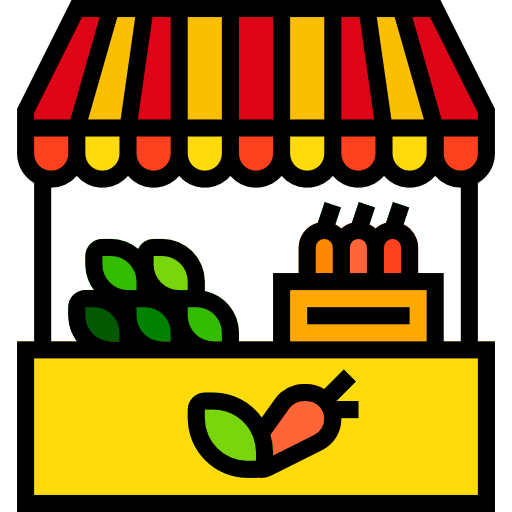
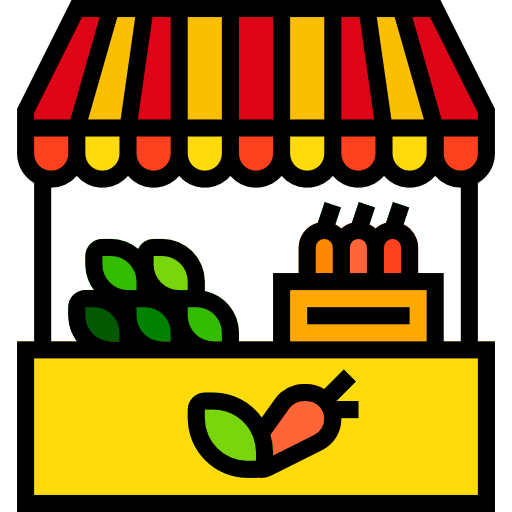
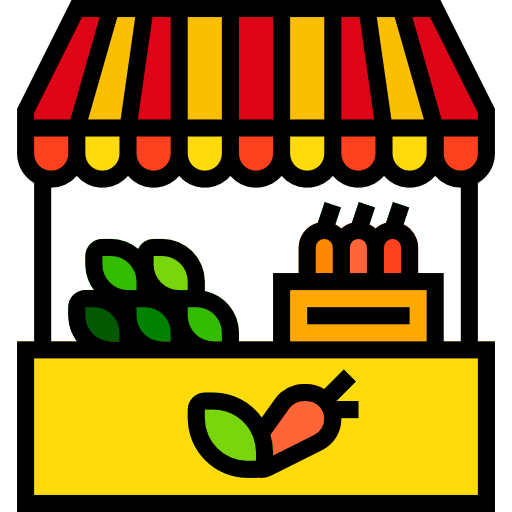
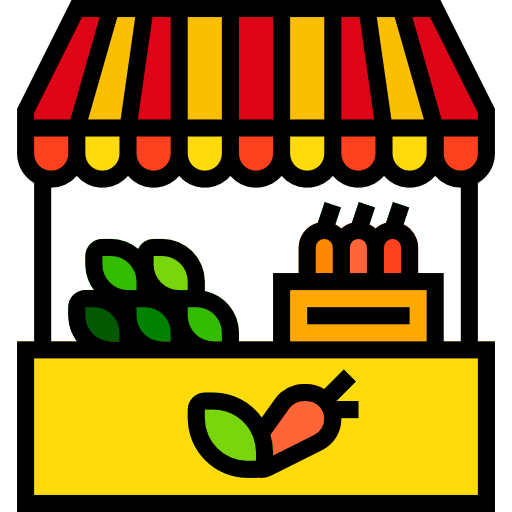
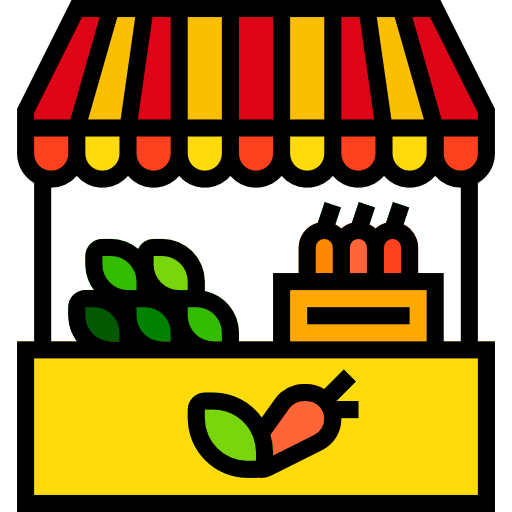
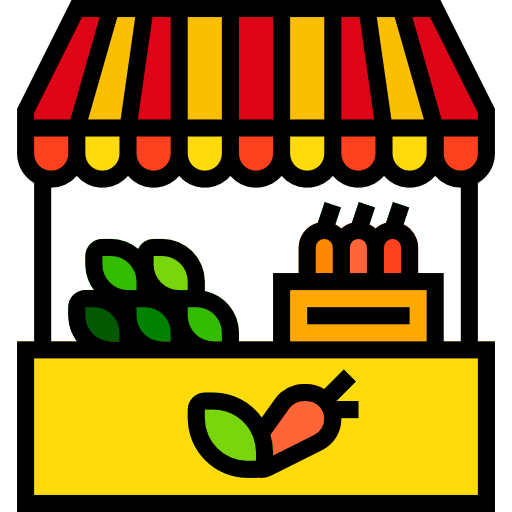
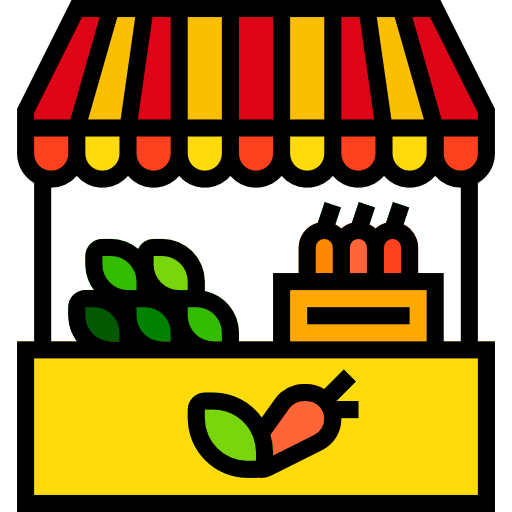
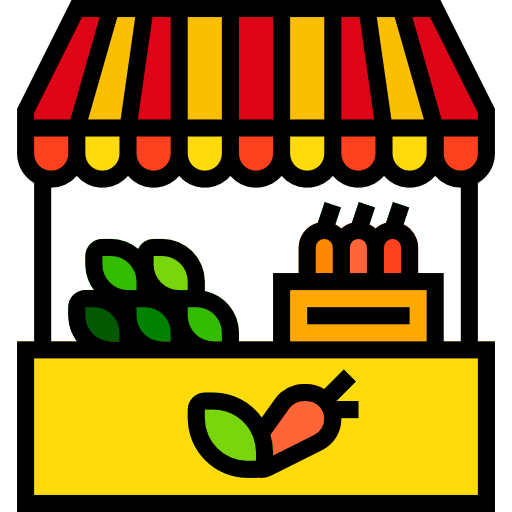
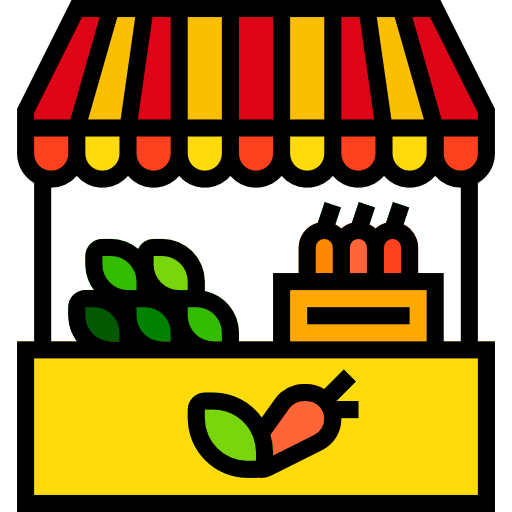
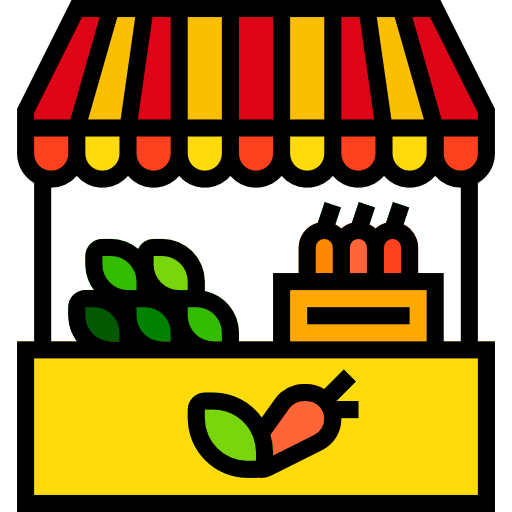
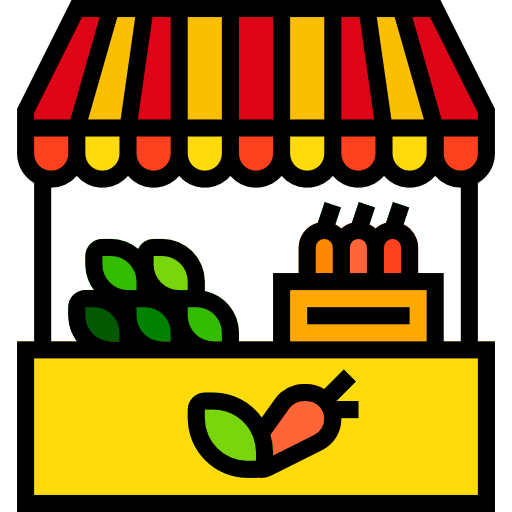
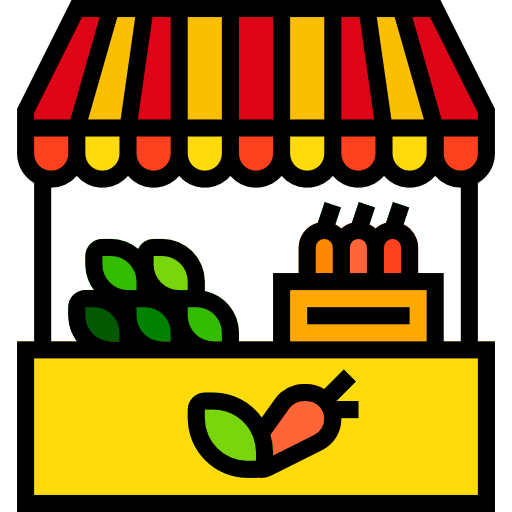
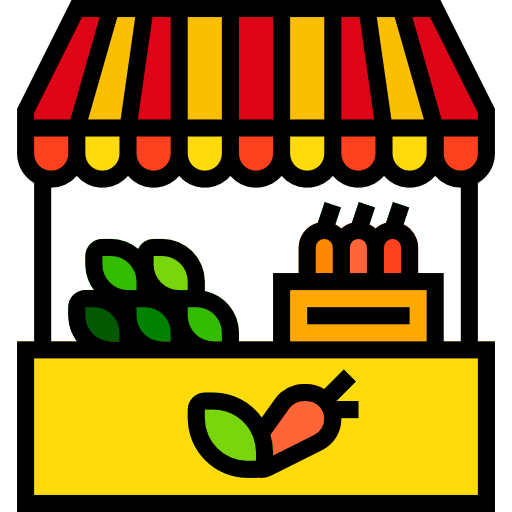
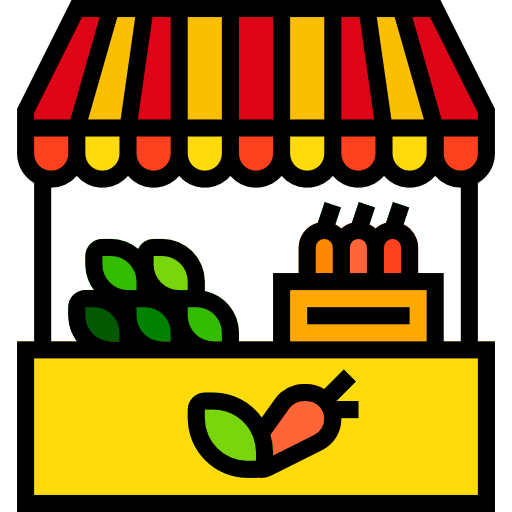

In [21]:
# 라이브러리
import folium
import webbrowser
from folium import IFrame

# 맵 생성
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=11)

# 데이터프레임의 각 위치에 마커 추가
for i in df.index:
    name =df.loc[i, '구분']
    gugun = df.loc[i, '구군명']
    location = df.loc[i, '소재지']
    tel = df.loc[i, '연락처']
    team = df.loc[i, '운영단체명']
    
    # 팝업 내용 지정(폰트 설정 등..)
    popup_content = f'<div style="font-family: Arial, sans-serif; font-size: 14px;"> [{gugun} {name}]<br>{location}<br>Tel. {tel}</div>'
    
    # IFrame을 사용하여 수평으로 표시되도록 팝업 설정
    popup = folium.Popup(IFrame(html=popup_content, width=200, height=80))
    
    # 'bank'와 'market'에 대한 아이콘 정의
    bank_icon = folium.CustomIcon(icon_image='이미지파일모음/bank.png', icon_size=(40, 40))
    market_icon = folium.CustomIcon(icon_image='이미지파일모음/market.png', icon_size=(10, 10))
    center_icon = folium.CustomIcon(icon_image='이미지파일모음/distribution-center.png', icon_size=(10, 10))
    
    
    # 이름에 따라 해당하는 아이콘 선택
    if '광역푸드뱅크' in team:
        icon = bank_icon
        
        # 마커 생성 및 팝업 추가
        marker = folium.Marker(
            location=[df.loc[i, '위도'], df.loc[i, '경도']],
            icon=icon,
            popup=popup
        )
        marker.add_to(map)
        continue
        
    if '뱅크' in name:
        icon = center_icon
    elif '마켓' in name:
        icon = market_icon
    else:
        icon = None
    
    
                                        
    # 마커 생성 및 팝업 추가
    marker = folium.Marker(
        location=[df.loc[i, '위도'], df.loc[i, '경도']],
        icon=icon,
        popup=popup
    )
    marker.add_to(map)

# 맵을 HTML 파일로 저장
map.save('map.html')

# 출력 화면에 맵 열기
map

# 새로운 웹 브라우저에서 맵 열기
# webbrowser.open('map.html')